In [1]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM)

In [2]:
import pandas as pd
import numpy as np
import math
import pandas_datareader as web
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
plt.style.use("fivethirtyeight")

In [3]:
# Hartalega stock
df = web.DataReader("5168.KL", data_source='yahoo', start='2012-01-01', end='2020-12-23')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,0.74000,0.73000,0.73000,0.73375,10047200.0,0.435486
2012-01-04,0.73750,0.71375,0.73500,0.73750,681600.0,0.437712
2012-01-05,0.74375,0.73750,0.74375,0.73875,1246400.0,0.438453
2012-01-06,0.74750,0.73875,0.74125,0.74125,2004000.0,0.439937
2012-01-09,0.74875,0.74500,0.74750,0.74750,244800.0,0.443647
...,...,...,...,...,...,...
2020-12-18,12.50000,12.26000,12.38000,12.36000,3385100.0,12.360000
2020-12-21,12.68000,12.28000,12.40000,12.50000,2782900.0,12.500000
2020-12-22,12.70000,12.50000,12.50000,12.60000,2462900.0,12.600000


Text(0, 0.5, 'Close Price USD')

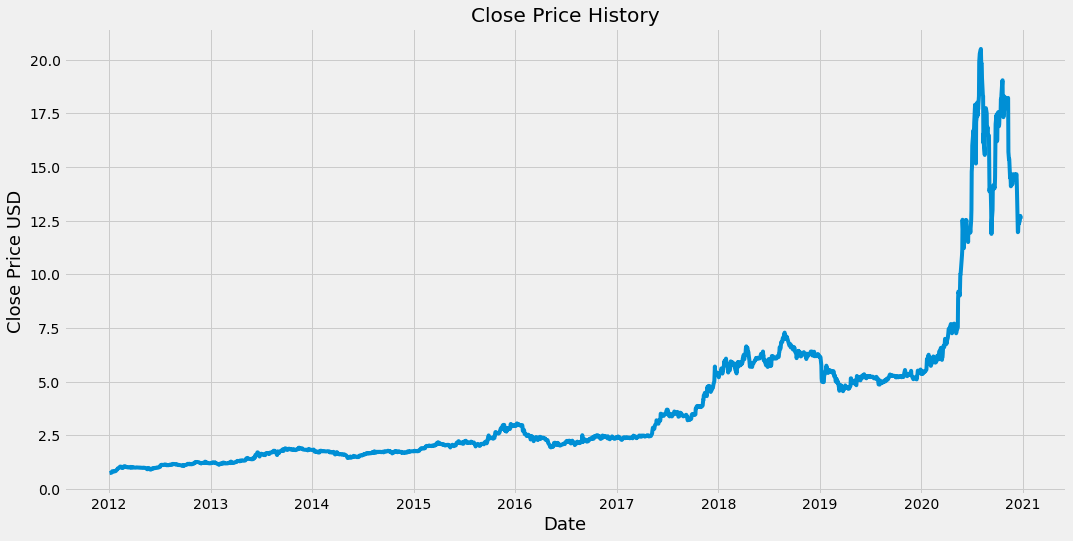

In [4]:
plt.figure(figsize=(16, 8))
plt.title("Close Price History")
plt.plot(df['Close'])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD", fontsize=18)

In [6]:
data = df.filter(['Close'])
dataset = data.values

train_data_len = math.ceil(len(dataset) * 0.8)
print(train_data_len)

1775


In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
sdata = scaler.fit_transform(dataset)

sdata

array([[0.00000000e+00],
       [1.89718648e-04],
       [2.52956187e-04],
       ...,
       [6.00328863e-01],
       [6.06399811e-01],
       [5.99317014e-01]])

In [8]:
# create training dataset
train_data = sdata[0: train_data_len, :]

X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60: i, 0])
    y_train.append(train_data[i, 0])

In [11]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [12]:
# reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1715, 60, 1)

In [13]:
# build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
# model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
# model.add(Dropout(0.2))
model.add(Dense(25))
# model.add(Dropout(0.5))
# model.add(Dense(15, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(1))

# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
model.fit(X_train, y_train, batch_size=3, epochs=10, verbose=1)
# model.fit(X_train, y_train, batch_size=1, epochs=1)

Epoch 1/10
572/572 [==============================] - 25s 38ms/step - loss: 5.6569e-04
Epoch 2/10
572/572 [==============================] - 21s 37ms/step - loss: 8.3351e-05
Epoch 3/10
572/572 [==============================] - 21s 38ms/step - loss: 9.0866e-05
Epoch 4/10
572/572 [==============================] - 21s 37ms/step - loss: 5.4666e-05
Epoch 5/10
572/572 [==============================] - 22s 38ms/step - loss: 4.7894e-05
Epoch 6/10
572/572 [==============================] - 22s 38ms/step - loss: 4.2795e-05
Epoch 7/10
572/572 [==============================] - 22s 38ms/step - loss: 3.0539e-05
Epoch 8/10
572/572 [==============================] - 22s 38ms/step - loss: 3.3540e-05
Epoch 9/10
572/572 [==============================] - 22s 38ms/step - loss: 2.0334e-05
Epoch 10/10
572/572 [==============================] - 22s 38ms/step - loss: 3.0135e-05


In [15]:
# create testing data set
test_data = sdata[train_data_len - 60:, :]

X_valid = []
y_valid = dataset[train_data_len:, :]

for i in range(60, len(test_data)):
    X_valid.append(test_data[i-60:i, 0])

In [16]:
test_data.shape

(503, 1)

In [17]:
X_valid = np.array(X_valid)

In [18]:
X_valid = np.reshape(X_valid, (X_valid.shape[0], X_valid.shape[1], 1))

In [19]:
# get the model predicted price values
predictions = model.predict(X_valid)
predictions = scaler.inverse_transform(predictions)

In [20]:
# get the root mean squared error RMSE
np.sqrt(((predictions - y_valid) ** 2).mean())

0.43855549475631517

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


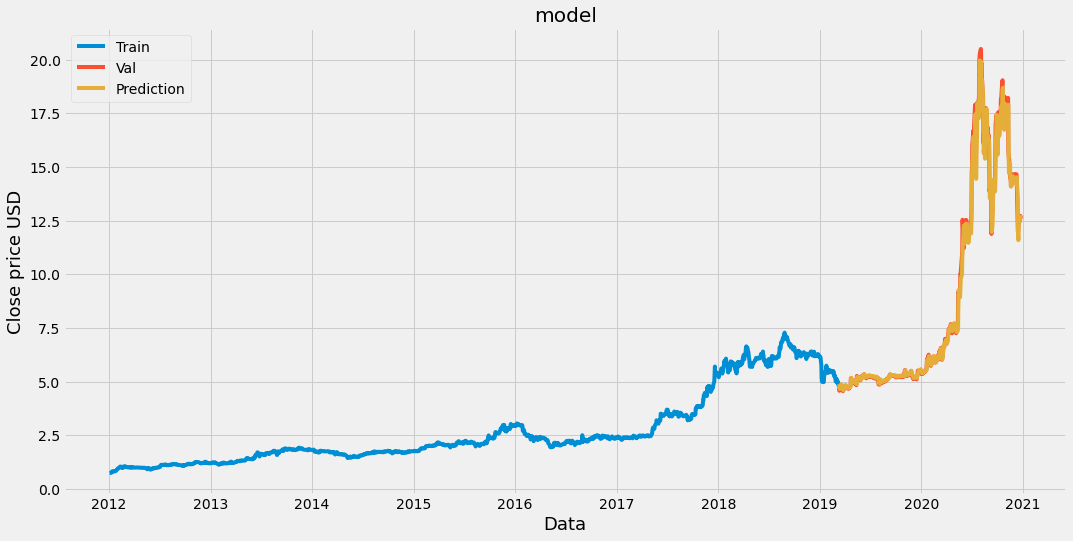

In [21]:
# plot data
train = data[:train_data_len]
valid = data[train_data_len:]

valid['predictions'] = predictions

plt.figure(figsize=(16, 8))
plt.title("model")
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close price USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'Val', 'Prediction'])

In [22]:
valid

,Close,predictions
Date,,
2019-03-12,4.71,4.877109
2019-03-13,4.57,4.779126
2019-03-14,4.62,4.659305
2019-03-15,4.76,4.658463
2019-03-18,4.83,4.774185
...,...,...
2020-12-18,12.36,12.492307
2020-12-21,12.50,12.520452
2020-12-22,12.60,12.604390


In [23]:
quote = web.DataReader('5168.KL', data_source='yahoo', start='2012-01-01', end='2020-12-23')
new_df = quote.filter(['Close'])
last_60_day = new_df[-60:].values
last_60_day_scaled = scaler.transform(last_60_day)
X_test = []
X_test.append(last_60_day_scaled)
X_test = np.array(X_test)

In [24]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [25]:
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
pred_price

array([[12.611068]], dtype=float32)

In [26]:
quote2 = web.DataReader('5168.KL', data_source='yahoo', start='2020-12-24', end='2020-12-24')
quote2['Close']

Date
2020-12-24    12.58
2020-12-24    12.58
Name: Close, dtype: float64